# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2383 Ноздрин Василий Ярославович и Плюсов Даниил Александрович. Вариант №10.

| Переменная | Назначение | Значение | Идентификатор |  
| --- | --- | --- | --- |  
| $N_{бр}$ | Номер бригады | $N_{бр}$ | $Nb$ |  
| N | Длина последовательности | $N=30+N_{бр}mod 5$ | N |  
| T | Период дискретизации | $T=0.0005(1+N_{бр}mod3)$ | T |  
| a | Основание экспоненты | $a=(−1)N_{бр}⋅(0.8+0.005⋅N_{бр}mod20))$ | a |  
| C | Амплитуда гармонического сигнала | $C=1+N_{бр}mod5$ | C |  
| $\hat{\omega} (рад)$ | Частота гармонического сигнала | $\hat{\omega}_0 = π / (6 + N_{бр} mod 5)$ | $w0$ |  
| m | Задержка | $m=5+N_{бр}mod5$ | m |  





In [ ]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt


Nb = 10
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = -1 * Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = pi / (6 + Nb % 5)
m = 5 + Nb % 5


print(f'{Nb = }\n{N = }\n{T = }\n{a = }\n{C = }\n{w0 = }\n{m = }')

Nb = 10
N = 30
T = 0.001
a = -8.5
C = 1
w0 = 0.5235987755982988
m = 5


Смоделируем единичный цифровой импульс $\delta_d(k)$:
$$\delta_d(k) = \left\{
    \begin{array}{cl}
        0 & k \ne 0 \\
        1 & k = 0.
    \end{array}
\right.$$

На интервалах дискретного времени $nT∈[0, (N−1)T]$ и дискретного нормированного времени $n∈[0, N−1]$


Дискретное нормированное время - это дискретное время с шагом дискретизации равным единице.

Единичный цифровой импульс - это сужение дельта-функции на дискретное множество-время.

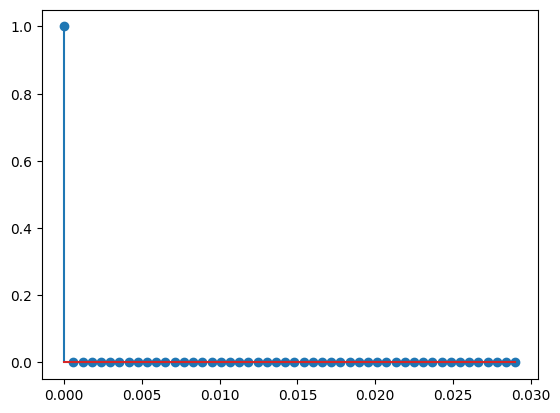

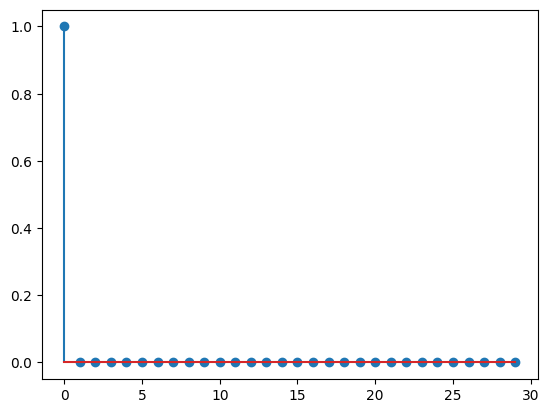

In [ ]:
def dirak(x, m=0):
    y = np.zeros(x.shape)
    y[x == m] = 1
    return y

x = np.linspace(start=0, stop=(N - 1) * T)
x_norm = np.linspace(start=0, stop=N - 1, num=N)

plt.stem(x, dirak(x))
plt.show()
plt.stem(x_norm, dirak(x_norm))
plt.show()


Смоделируем дискретный единичный скачок $\sigma_d(k)$:
$$\sigma_d(k) = \left\{
    \begin{array}{cl}
        0 & k < 0 \\
        1 & k \ge 0.
    \end{array}
\right.$$

На интервалах дискретного времени $nT∈[0, (N−1)T]$ и дискретного нормированного времени $n∈[0, N−1]$

Дискретным единичный скачок - это сужение аналогового единичного скачка на дискретное пространство времени.

Частота дискретизации дискретного единичного скачка равна частоте дискретизации рассматриваемого прастранства.


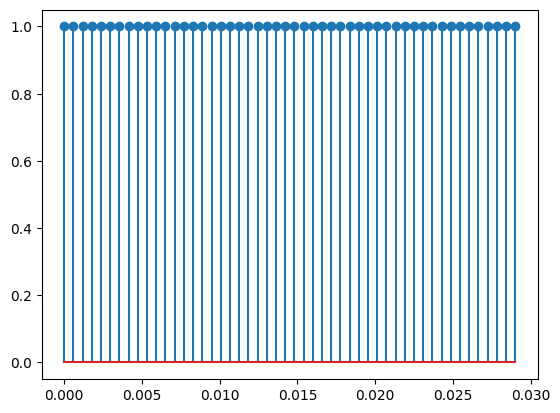

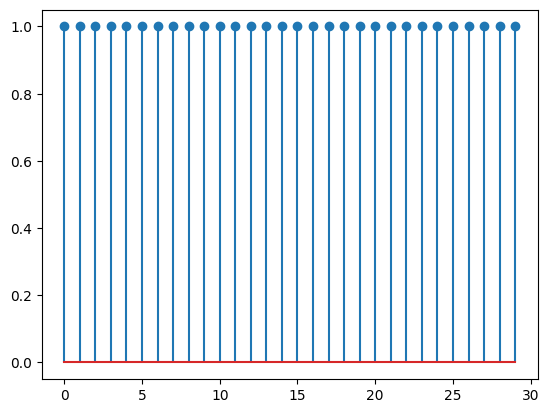

In [ ]:
def hs(_x, m=0):
    return np.heaviside(_x - m, 1)


plt.stem(x, hs(x))
plt.show()
plt.stem(x_norm, hs(x_norm))
plt.show()

Смоделируем дискретную функцию экспоненты $s_1(k)$:
$$s_1(k) = \left\{
    \begin{array}{cl}
        0 & k < 0 \\
        a^k & k \ge 0.
    \end{array}
\right.$$

На интервалах дискретного времени $nT∈[0, (N−1)T]$ и дискретного нормированного времени $n∈[0, N−1]$


Дискретная экспонента - это сужение аналоговой экспоненты на дискретное пространство времени.

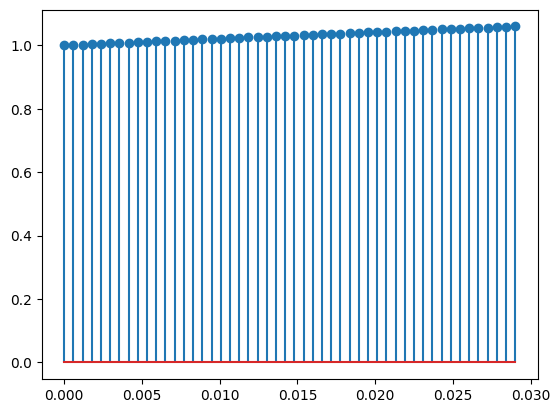

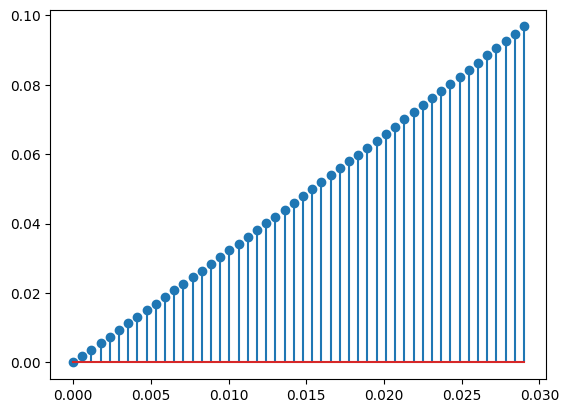

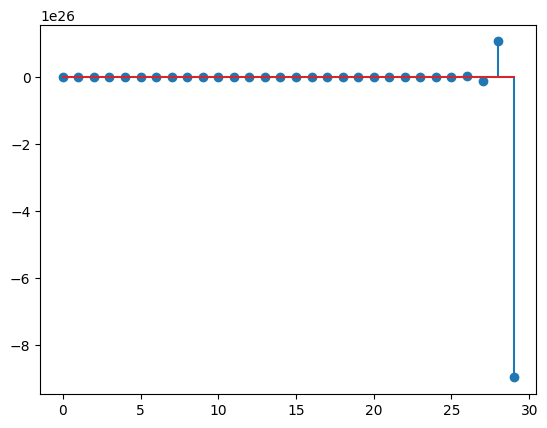

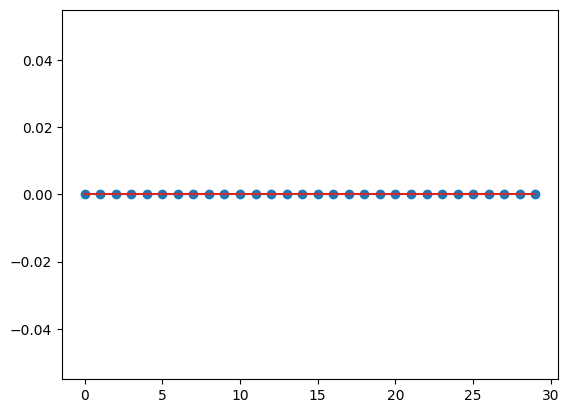

In [ ]:
def exp(_x, m=0):
    y_r = np.zeros(_x.shape)
    y_i = np.zeros(_x.shape)

    ans = np.float_power(a + 0j, _x[_x >= m] - m)

    y_r[_x >= m] = ans.real
    y_i[_x >= m] = ans.imag

    return y_r, y_i


plt.stem(x, exp(x)[0])
plt.show()
plt.stem(x, exp(x)[1])
plt.show()

plt.stem(x_norm, exp(x_norm)[0])
plt.show()
plt.stem(x_norm, exp(x_norm)[1])
plt.show()



Второй график получился не очень наглядным. Если сделать модуль экспоненты меньше, то можно получить более визуально-наглядный пример.

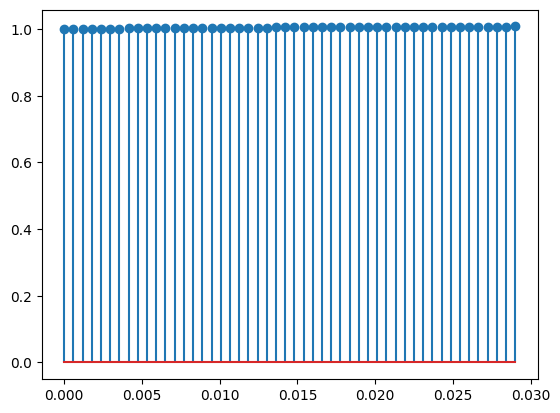

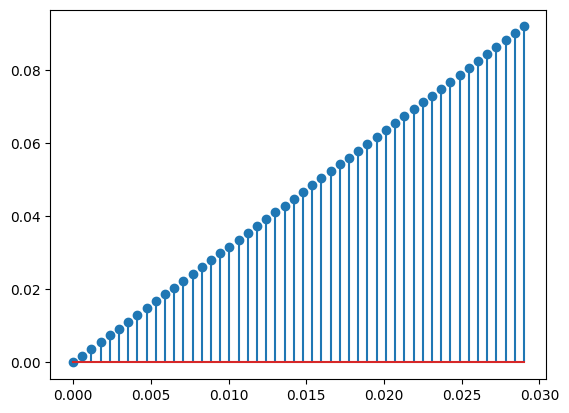

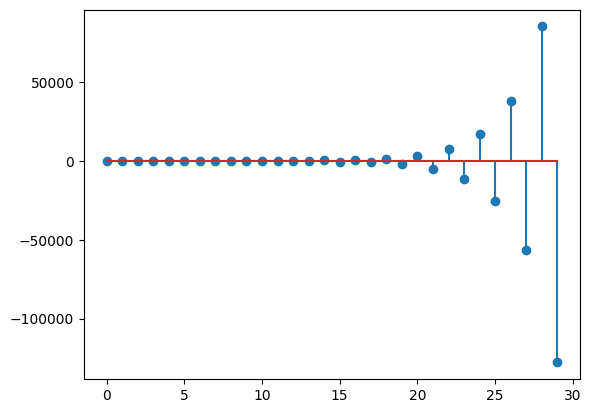

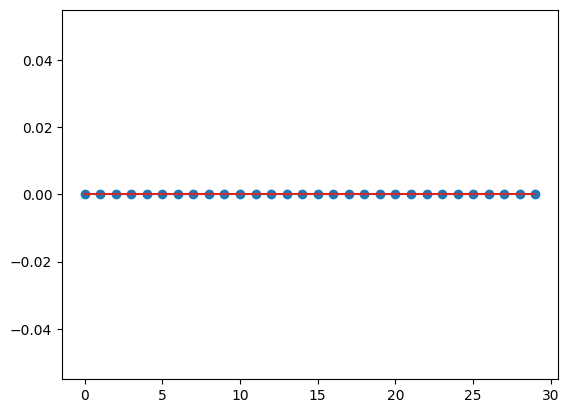

In [ ]:
good_base = a + 7

def exp_good_base(_x, m=0):
    y_r = np.zeros(_x.shape)
    y_i = np.zeros(_x.shape)

    ans = np.float_power(good_base + 0j, _x[_x >= m] - m)

    y_r[_x >= m] = ans.real
    y_i[_x >= m] = ans.imag

    return y_r, y_i


plt.stem(x, exp_good_base(x)[0])
plt.show()
plt.stem(x, exp_good_base(x)[1])
plt.show()

plt.stem(x_norm, exp_good_base(x_norm)[0])
plt.show()
plt.stem(x_norm, exp_good_base(x_norm)[1])
plt.show()


Смоделируем дискретный комплексный гармонический сигнал $s_2(k)$:
$$s_2(k) = Cexp(j\hat\omega_0k)$$

На интервалах дискретного времени $nT∈[0, (N−1)T]$ и дискретного нормированного времени $n∈[0, N−1]$

Запишем данный сигнал в виде комбинации двух вещественных последовательностей.

$$Re(s_2(k)) = Ccos(\hat\omega Tk)$$  

$$Im(s_2(k)) = Csin(\hat\omega Tk)$$  

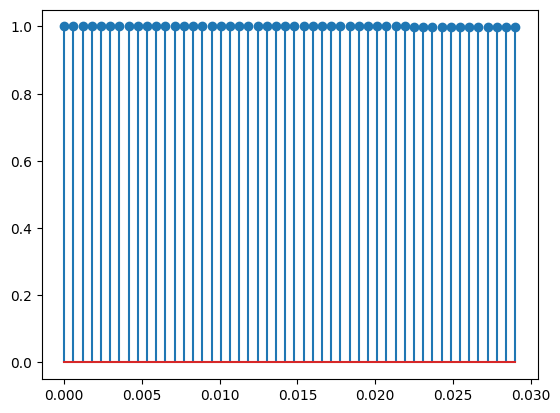

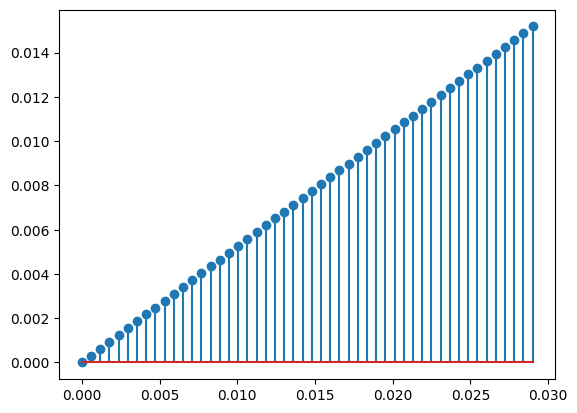

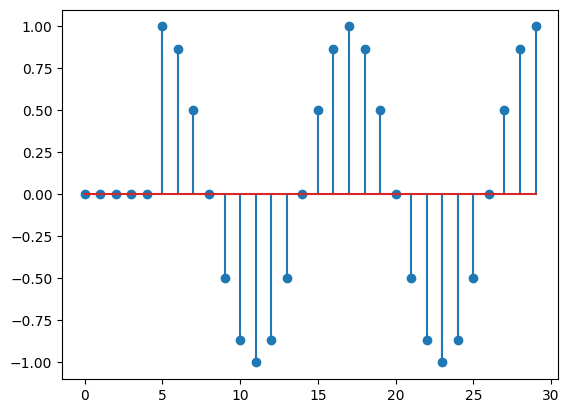

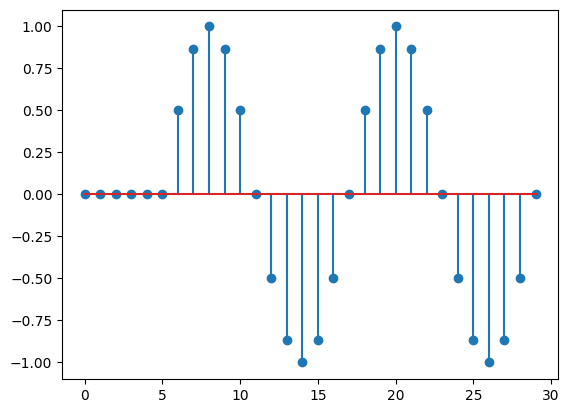

In [ ]:
def exp2(_x, m=0):
    y_r = np.zeros(_x.shape)
    y_i = np.zeros(_x.shape)

    ans = C * np.exp(1j * w0 * (_x[_x >= m] - m))

    y_r[_x >= m] = ans.real
    y_i[_x >= m] = ans.imag
    return y_r, y_i


plt.stem(x, exp2(x)[0])
plt.show()
plt.stem(x, exp2(x)[1])
plt.show()

plt.stem(x_norm, exp2(x_norm, 5)[0])
plt.show()
plt.stem(x_norm, exp2(x_norm, 5)[1])
plt.show()


Смоделируем $\delta_d(k), \sigma_d(k) и s_1(k)$, задержанных на m отсчетов, на интервале времени $n\in[0,N−1]$.
Также построим графики последовательностей этих.


Формулы задержанных последовательностей:
$$
\delta_d(k-m) = \left\{
    \begin{array}{cl}
        0 & k \ne m \\
        1 & k = m.
    \end{array}
\right.
$$

$$
\sigma_d(k-m) = \left\{
    \begin{array}{cl}
        0 & k < m \\
        1 & k \ge m.
    \end{array}
\right.
$$

$$
s_1(k-m) = \left\{
    \begin{array}{cl}
        0 & k < m \\
        a^{k-m} & k \ge m.
    \end{array}
\right.
$$


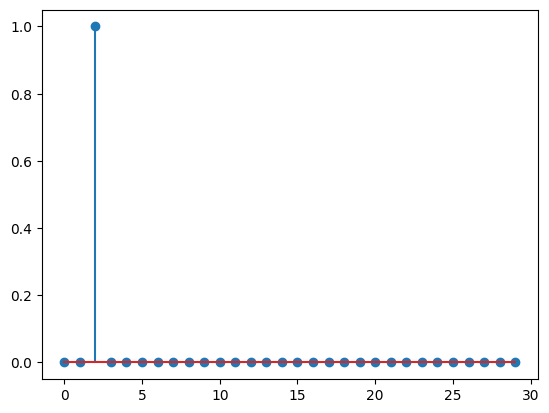

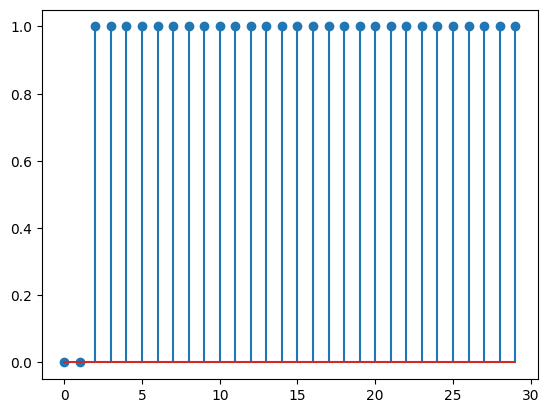

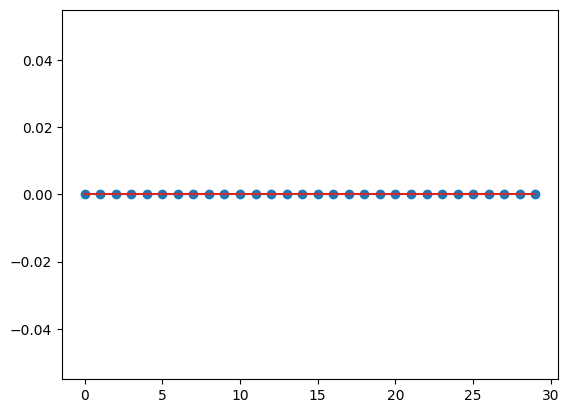

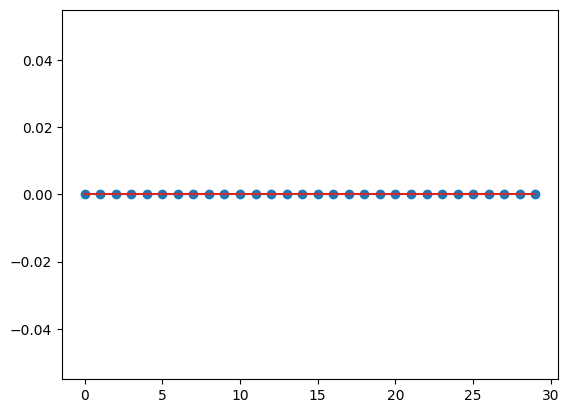

In [ ]:
x_norm = np.linspace(start=0, stop=N - 1, num=N)

plt.stem(x_norm, dirak(x_norm, m=2))
plt.show()

plt.stem(x_norm, hs(x_norm, m=2))
plt.show()

plt.stem(x_norm, exp(x_norm, m=2)[1])
plt.show()

plt.stem(x_norm, exp(x_norm, m=2)[1])
plt.show()

## Выводы

В ходе выполнения лабораторной работы были смоделированы стандартные дискретные последовательности: единичный цифровой импульс, единичный скачок, экспоненциальная функция и комплексный гармонический сигнал. Также была определена связь между дискретным и дискретным нормированным временем, были показаны отличия дискретных сигналов от аналоговых. Кроме того, был записан комплексный гармонический сигнал в виде комбинации двух вещественных последовательностей и были построены графики с задержками на m отсчетов для пунктов 1-3.